In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [28]:
data_path = "../data/Placement_Data_Full_Class.csv"
df = pd.read_csv(data_path)

In [29]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [30]:
for col in df.columns.unique():
    print('\n', col ,'\n', df[col].unique())


 sl_no 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]

 gender 
 ['M' 'F']

 ssc_p 
 [67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63

In [31]:
df1 = df.copy()

In [32]:
df.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

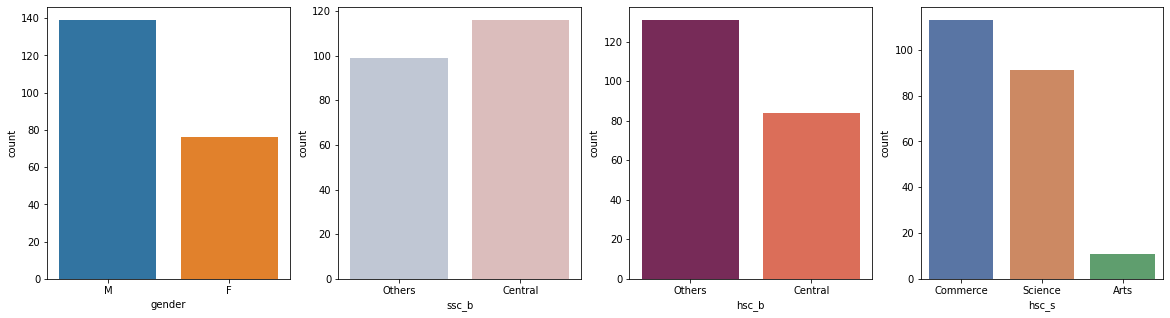

In [34]:
fig, axs = plt.subplots(ncols=4,figsize=(20,5))
sns.countplot(df['gender'], ax = axs[0])
sns.countplot(df['ssc_b'], ax = axs[1], palette="vlag")
sns.countplot(df['hsc_b'], ax = axs[2], palette="rocket")
sns.countplot(df['hsc_s'], ax = axs[3], palette="deep")

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

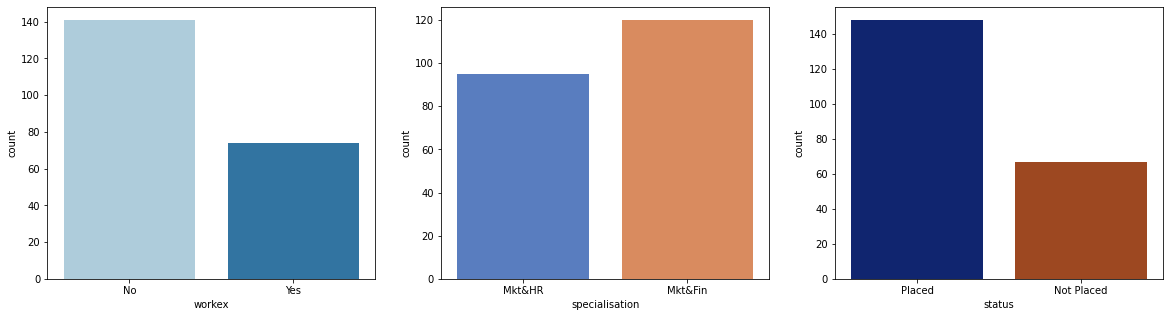

In [35]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(df['workex'], ax = axs[0], palette="Paired")
sns.countplot(df['specialisation'], ax = axs[1], palette="muted")
sns.countplot(df['status'], ax = axs[2],palette="dark")

In [36]:
df = df.drop(['sl_no'], axis = 1)

In [37]:
le = LabelEncoder()

In [38]:
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])

<AxesSubplot:>

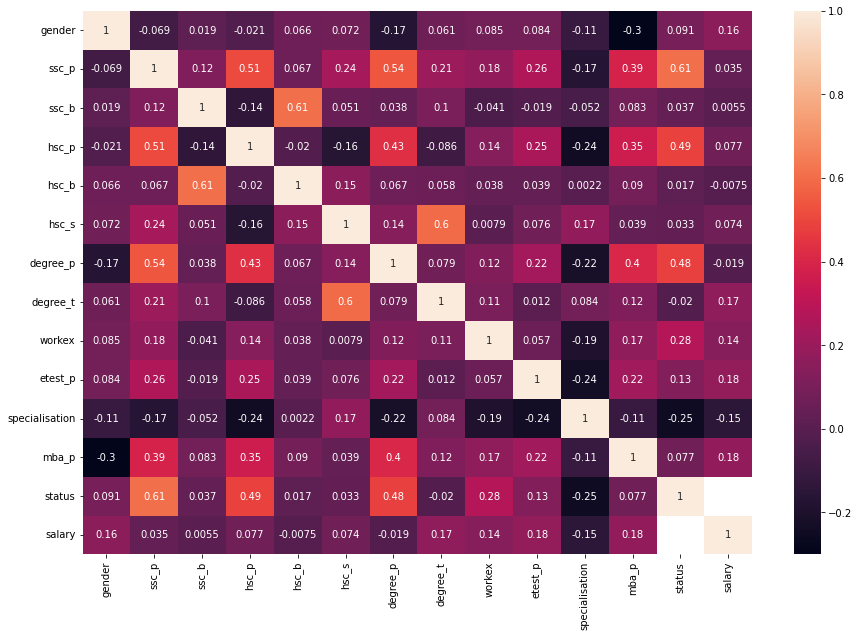

In [39]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot = True)

<AxesSubplot:xlabel='status', ylabel='degree_p'>

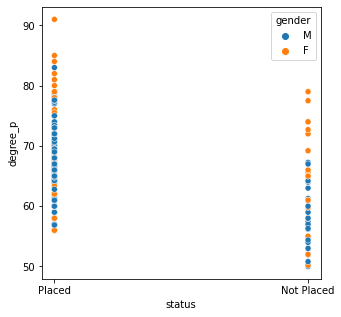

In [40]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='status', y = 'degree_p', hue ='gender', data = df1)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='mba_p', ylabel='Density'>

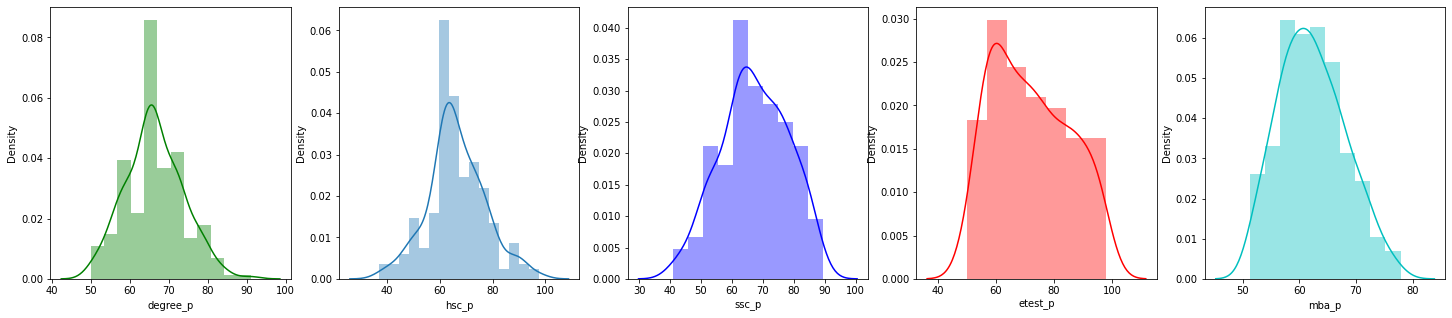

In [41]:
fig, axs = plt.subplots(ncols=5,figsize=(25,5))
sns.distplot(df1['degree_p'], ax= axs[0], color = 'g')
sns.distplot(df1['hsc_p'], ax= axs[1])
sns.distplot(df1['ssc_p'],  ax= axs[2], color = 'b')
sns.distplot(df1['etest_p'],  ax= axs[3], color = 'r')
sns.distplot(df1['mba_p'],  ax= axs[4], color = 'c')

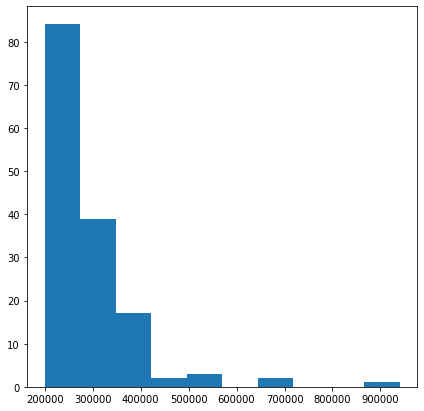

In [42]:
plt.figure(figsize=(7,7))
plt.hist(df1['salary'], bins = 10)
plt.show()

<AxesSubplot:xlabel='degree_p', ylabel='hsc_p'>

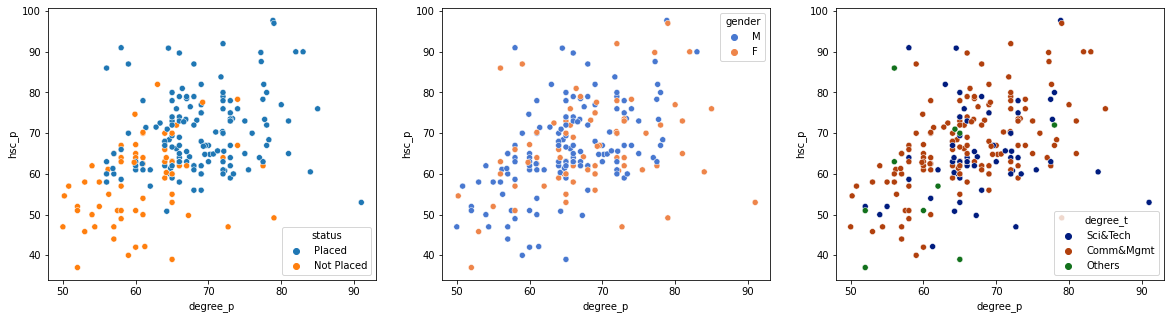

In [43]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(x = 'degree_p',y='hsc_p',hue='status',data = df1, ax= axs[0])
sns.scatterplot(x = 'degree_p',y='hsc_p',hue='gender',data = df1, ax= axs[1], palette="muted")
sns.scatterplot(x = 'degree_p',y='hsc_p',hue='degree_t',data = df1, palette="dark", ax= axs[2])

<AxesSubplot:xlabel='degree_p', ylabel='salary'>

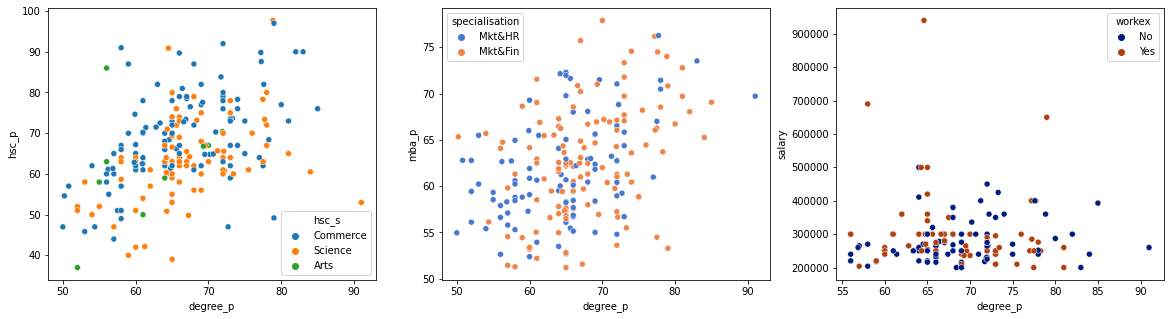

In [44]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(x = 'degree_p',y='hsc_p',hue='hsc_s',data = df1, ax= axs[0])
sns.scatterplot(x = 'degree_p',hue='specialisation',y='mba_p',data = df1, ax= axs[1], palette="muted")
sns.scatterplot(x = 'degree_p',hue='workex',y='salary',data = df1, palette="dark", ax= axs[2])

In [45]:
df = pd.DataFrame(df)
df_placed = df1[df1['status'] == 'Placed']

In [46]:
df2 = df_placed.groupby(['degree_t','degree_p','mba_p','specialisation','hsc_p', 'hsc_s','salary', 'workex']).sum().sort_values(by ='salary')
df2

sl_no  \
degree_t  degree_p mba_p specialisation hsc_p hsc_s    salary   workex          
Comm&Mgmt 69.00    64.66 Mkt&Fin        75.00 Commerce 200000.0 Yes        16   
                   65.63 Mkt&HR         56.00 Science  200000.0 No        136   
Sci&Tech  77.48    66.28 Mkt&Fin        78.33 Science  200000.0 Yes         2   
Comm&Mgmt 81.00    69.70 Mkt&Fin        73.00 Commerce 200000.0 Yes        45   
          68.40    62.98 Mkt&HR         73.20 Science  200000.0 No         51   
...                                                                       ...   
Sci&Tech  64.27    66.23 Mkt&Fin        50.83 Science  500000.0 Yes       175   
          64.00    66.46 Mkt&Fin        67.00 Science  500000.0 No        164   
Comm&Mgmt 79.00    70.81 Mkt&Fin        97.00 Commerce 650000.0 Yes       178   
Sci&Tech  58.00    61.30 Mkt&Fin        58.66 Science  690000.0 Yes       151   
Comm&Mgmt 64.60    64.34 Mkt&Fin        68.40 Commerce 940000.0 Yes       120   

                                                                        ssc_p  \
degree_t  degree_p mba_p specialisation hsc_p hsc_s    salary   workex          
Comm&Mgmt 69.00    64.66 Mkt&Fin        75.00 Commerce 200000.0 Yes     65.00   
                   65.63 Mkt&HR         56.00 Science  200000.0 No      72.00   
Sci&Tech  77.48    66.28 Mkt&Fin        78.33 Science  200000.0 Yes     79.33   
Comm&Mgmt 81.00    69.70 Mkt&Fin        73.00 Commerce 200000.0 Yes     77.00   
          68.40    62.98 Mkt&HR         73.20 Science  200000.0 No      75.20   
...                                                                       ...   
Sci&Tech  64.27    66.23 Mkt&Fin        50.83 Science  500000.0 Yes     73.24   
          64.00    66.46 Mkt&Fin        67.00 Science  500000.0 No      63.00   
Comm&Mgmt 79.00    70.81 Mkt&Fin        97.00 Commerce 650000.0 Yes     73.00   
Sci&Tech  58.00    61.30 Mkt&Fin        58.66 Science  690000.0 Yes     71.00   
Comm&Mgmt 64.60    64.34 Mkt&Fin        68.40 Commerce 940000.0 Yes     60.80   

                                                                        etest_p  
degree_t  degree_p mba_p specialisation hsc_p hsc_s    salary   workex           
Comm&Mgmt 69.00    64.66 Mkt&Fin        75.00 Commerce 200000.0 Yes       72.00  
                   65.63 Mkt&HR         56.00 Science  200000.0 No        55.60  
Sci&Tech  77.48    66.28 Mkt&Fin        78.33 Science  200000.0 Yes       86.50  
Comm&Mgmt 81.00    69.70 Mkt&Fin        73.00 Commerce 200000.0 Yes       89.00  
          68.40    62.98 Mkt&HR         73.20 Science  200000.0 No        65.00  
...                                                                         ...  
Sci&Tech  64.27    66.23 Mkt&Fin        50.83 Science  500000.0 Yes       64.00  
          64.00    66.46 Mkt&Fin        67.00 Science  500000.0 No        75.00  
Comm&Mgmt 79.00    70.81 Mkt&Fin        97.00 Commerce 650000.0 Yes       89.00  
Sci&Tech  58.00    61.30 Mkt&Fin        58.66 Science  690000.0 Yes       56.00  
Comm&Mgmt 64.60    64.34 Mkt&Fin        68.40 Commerce 940000.0 Yes       82.66  

[148 rows x 3 columns]

In [47]:
df_np = df1[df1.status == 'Not Placed']
df3 = df_np.groupby(['degree_t','degree_p','mba_p','specialisation','hsc_p', 'hsc_s','workex']).sum().sort_values(by ='degree_p')
df3

sl_no  ssc_p  \
degree_t  degree_p mba_p specialisation hsc_p hsc_s    workex                 
Comm&Mgmt 50.0     54.96 Mkt&HR         47.00 Commerce No         15  62.00   
          50.2     65.33 Mkt&Fin        54.60 Commerce Yes        26  52.58   
          50.8     62.79 Mkt&HR         57.00 Commerce No         92  52.00   
Sci&Tech  52.0     59.43 Mkt&HR         52.00 Science  No          4  56.00   
Others    52.0     62.77 Mkt&HR         51.00 Science  No         35  62.00   
...                                                              ...    ...   
Sci&Tech  72.7     59.24 Mkt&HR         47.00 Commerce No         69  69.70   
Comm&Mgmt 74.0     60.44 Mkt&Fin        67.00 Commerce No         83  63.00   
                   74.56 Mkt&Fin        78.33 Commerce No        166  63.30   
          77.5     67.00 Mkt&HR         62.00 Commerce No         76  59.00   
          79.0     53.29 Mkt&Fin        49.20 Commerce No          7  46.00   

                                                               etest_p  salary  
degree_t  degree_p mba_p specialisation hsc_p hsc_s    workex                   
Comm&Mgmt 50.0     54.96 Mkt&HR         47.00 Commerce No        76.00     0.0  
          50.2     65.33 Mkt&Fin        54.60 Commerce Yes       76.00     0.0  
          50.8     62.79 Mkt&HR         57.00 Commerce No        67.00     0.0  
Sci&Tech  52.0     59.43 Mkt&HR         52.00 Science  No        66.00     0.0  
Others    52.0     62.77 Mkt&HR         51.00 Science  No        68.44     0.0  
...                                                                ...     ...  
Sci&Tech  72.7     59.24 Mkt&HR         47.00 Commerce No        79.00     0.0  
Comm&Mgmt 74.0     60.44 Mkt&Fin        67.00 Commerce No        82.00     0.0  
                   74.56 Mkt&Fin        78.33 Commerce No        80.00     0.0  
          77.5     67.00 Mkt&HR         62.00 Commerce No        74.00     0.0  
          79.0     53.29 Mkt&Fin        49.20 Commerce No        74.28     0.0  

[67 rows x 4 columns]

In [48]:
X = df.dropna().drop(['status'], axis = 1)
y = df.dropna()['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[37]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

Accuracy: 1.0
